# Question 1 (10 marks)

You are provided with a dataset of shape (1000, 10), where each row represents a pair of an end-effector position and its corresponding joint angles. Each row consists of:

(1) The first 3 dimensions: robot end-effector position (x, y, z)
(2) The last 7 dimensions: corresponding robot joint angles (7-DOF robot arm)

Answer the question below:

Given a new end-effector position (-0.18067622, -0.18449534, 1.61964518), use KNN to predict its corresponding joint angles (i.e., solving the inverse kinematics problem)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The dataset include 1000 samples/trajectories


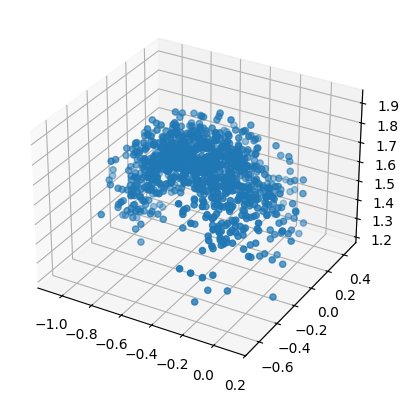

In [2]:
data = np.load("data.npy")
eef_position = data[..., 0:3]   # x, y, z coordinates
joint_angles = data[..., 3:]    # joint angles for a seven degree of freedom robot
print("The dataset include {} samples/trajectories".format(len(data)))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(eef_position[:, 0], eef_position[:, 1], eef_position[:, 2])
plt.show()

K=2 0.10761487283921993
K=3 0.10078608385401475
K=4 0.13604593770816903
K=5 0.16289347620824385
K=6 0.15802144548642622
K=7 0.14960720431786814
K=8 0.15261637542882597
K=9 0.19196024778380738
K=10 0.16685096327942614
K=11 0.15171568282242556
K=12 0.17989860107226613
K=13 0.16577951546405453
K=14 0.16177332572371478


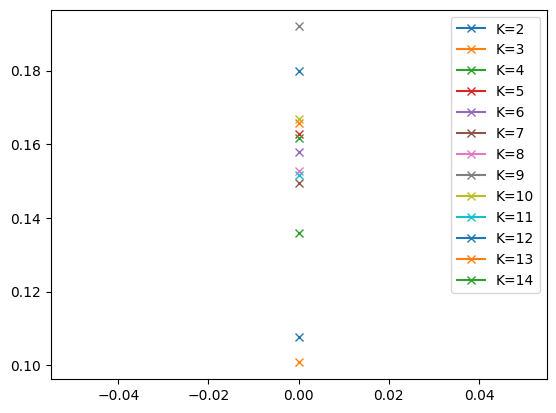

In [43]:
new_eef_pos = np.array([-0.18067622, -0.18449534, 1.61964518]) # desired end-effector position

# TODO: write your code here, implement KNN to solve the inverse kinematics problem.
K = 3
def KNN(eef_position, joint_angles, new_eef_pos, K):
    distances = np.linalg.norm(eef_position - new_eef_pos, axis=1)
    idx = np.argsort(distances)[:K]
    return np.mean(joint_angles[idx], axis=0)

actual_joint_angles = [-0.28158251, 0.64710445, 0.64139232, -0.0452992, -0.29836178, -0.27488041, 0.61142905]

new_data = []
for i in range(2, 15):
    data = KNN(eef_position, joint_angles, new_eef_pos, i)
    plt.plot(np.mean(abs(data-actual_joint_angles)),label="K={}".format(i), marker='x')
    print(f"K={i}", np.mean(abs(data-actual_joint_angles)))

plt.legend()
plt.show()


# Discuss the results in your report

For the given end-effector position (-0.18067622, -0.18449534, 1.61964518), the actual joint angles are (-0.28158251, 0.64710445, 0.64139232, -0.0452992, -0.29836178, -0.27488041, 0.61142905).

Experiment with different values of K and evaluate their performance. Then, analyze and discuss your findings in the report. You do not need to write code for this section—focus on interpreting and explaining the results in your discussion.

In [ ]:
# TODO: discuss your results in your report (5 marks), no code required here, no code required for the report.

